In [1]:
import pandas as pd

In [2]:
file_path = 'final_test_data_set.pkl'
data = pd.read_pickle(file_path)

In [3]:
data.columns

Index(['topics', 'user_input', 'reference_contexts', 'reference',
       'synthesizer_name', 'language'],
      dtype='object')

In [4]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

unique_questions = data['user_input'].nunique()

avg_contexts_per_question = data['reference_contexts'].apply(len).mean()

avg_context_length = data['reference_contexts'].apply(
    lambda contexts: sum(len(context) for context in contexts) / len(contexts) if contexts else 0).mean()
avg_answer_length = data['reference'].apply(len).mean()

general_stats = {
    "Number of Unique Questions": unique_questions,
    "Average Contexts per Question": avg_contexts_per_question,
    "Average Context Length (characters)": avg_context_length,
    "Average Answer Length (characters)": avg_answer_length
}

context_lengths = [len(context) for contexts in data['reference_contexts'] for context in contexts]

In [5]:
pd.DataFrame([general_stats]).to_html(index=False)

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th>Number of Unique Questions</th>\n      <th>Average Contexts per Question</th>\n      <th>Average Context Length (characters)</th>\n      <th>Average Answer Length (characters)</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <td>131</td>\n      <td>1.466165</td>\n      <td>961.518797</td>\n      <td>589.586466</td>\n    </tr>\n  </tbody>\n</table>'

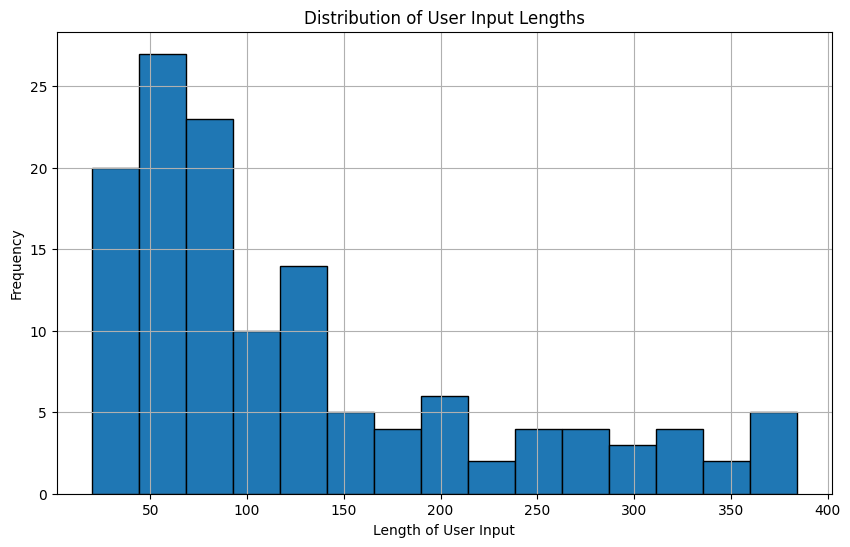

In [6]:
import matplotlib.pyplot as plt

stats = data.describe(include='all')

data['user_input_length'] = data['user_input'].str.len()

plt.figure(figsize=(10, 6))
plt.hist(data['user_input_length'], bins=15, edgecolor='black')
plt.title('Distribution of User Input Lengths')
plt.xlabel('Length of User Input')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

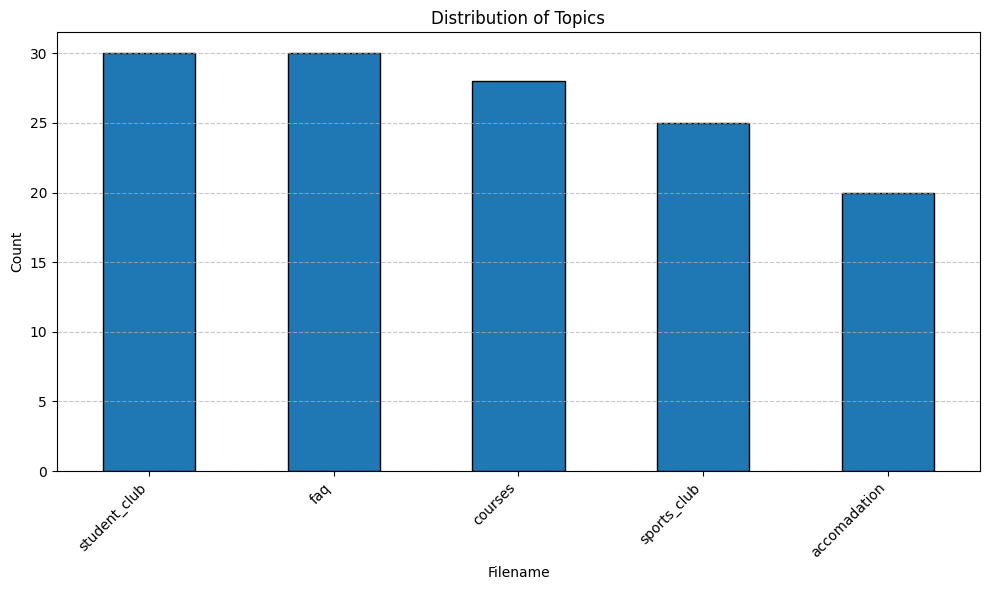

In [7]:
filename_distribution = data['topics'].value_counts()

plt.figure(figsize=(10, 6))
filename_distribution.plot(kind='bar', edgecolor='black')
plt.title('Distribution of Topics')
plt.xlabel('Filename')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

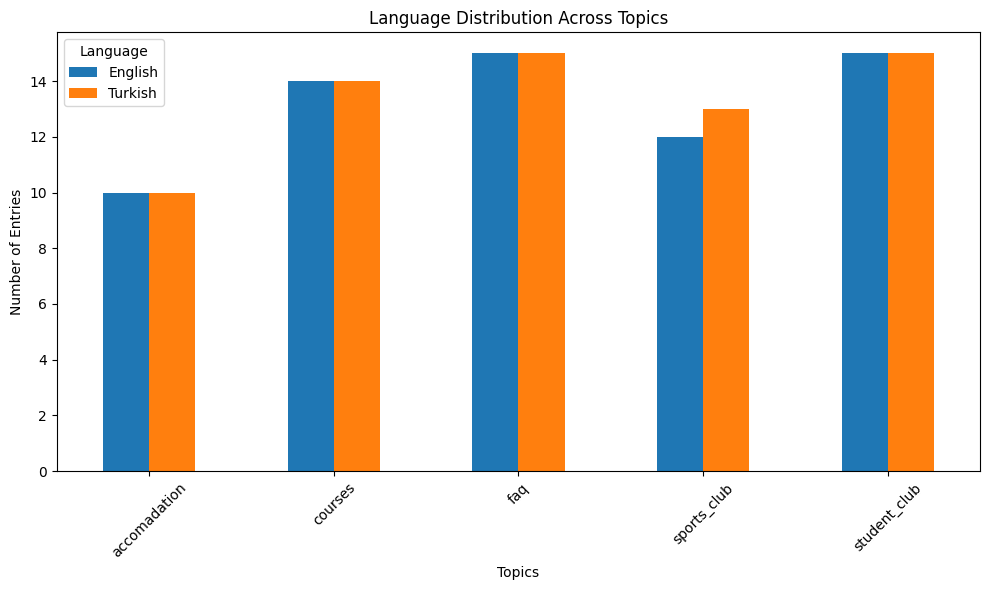

In [8]:
language_distribution = data.groupby(['topics', 'language']).size().unstack(fill_value=0)
fig, ax = plt.subplots(figsize=(10, 6))
language_distribution.plot(kind='bar', ax=ax)

ax.set_title('Language Distribution Across Topics')
ax.set_xlabel('Topics')
ax.set_ylabel('Number of Entries')
ax.legend(title='Language')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()